In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-employee-attrition/HR Employee Attrition.csv


In [2]:
df=pd.read_csv('/kaggle/input/hr-employee-attrition/HR Employee Attrition.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [5]:
df = df.rename(columns=lambda x: x.lower())

In [6]:
tabel = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
age,43,0,0.0,0,int64
attrition,2,0,0.0,0,object
businesstravel,3,0,0.0,0,object
dailyrate,886,0,0.0,0,int64
department,3,0,0.0,0,object
distancefromhome,29,0,0.0,0,int64
education,5,0,0.0,0,int64
educationfield,6,0,0.0,0,object
employeecount,1,0,0.0,0,int64
employeenumber,1470,0,0.0,0,int64


In [7]:
df.shape

(1470, 35)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
dailyrate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
distancefromhome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
employeecount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employeenumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
environmentsatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
hourlyrate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
jobinvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
joblevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
df.duplicated().sum().sum()

0

In [10]:
categoric = df.select_dtypes(include='O')
for i in categoric.columns:
  print(categoric[i].value_counts())
  print()

No     1233
Yes     237
Name: attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: businesstravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: educationfield, dtype: int64

Male      882
Female    588
Name: gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: jobrole, dtype: int64

Married     673
Single      470
Divorced    327
Name: maritalstatus, dtype: int64

Y    1470
Name: over18, dtype: int64

No     1054
Yes     416
Na

In [11]:
df.replace({'Yes':1, 'No':0, 'Male':1, 'Female':0, 'Y':1,'N':0}, inplace=True)

In [12]:
df['attrition'].unique()

array([1, 0])

In [13]:
categoric = df.select_dtypes(include='O')

In [14]:
df = pd.get_dummies(df, columns=[col for col in df.columns if col in categoric])
df.head()

,age,attrition,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,...,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


In [15]:
y = df.attrition
x = df.drop('attrition', axis=1)

<AxesSubplot:ylabel='attrition'>

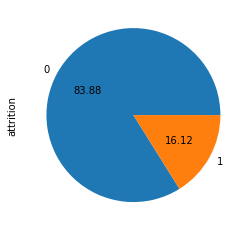

In [16]:
y.value_counts().plot.pie(autopct='%.2f')

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x,y)

<AxesSubplot:ylabel='attrition'>

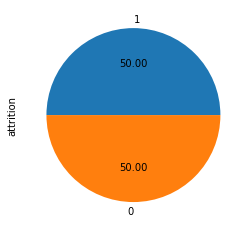

In [18]:
y.value_counts().plot.pie(autopct='%.2f')

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [22]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [23]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models.sort_values('Accuracy', ascending=False))

100%|██████████| 29/29 [00:05<00:00,  5.76it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.93               0.93     0.93      0.93   
LogisticRegression                 0.92               0.93     0.93      0.92   
RandomForestClassifier             0.92               0.92     0.92      0.92   
LGBMClassifier                     0.92               0.92     0.92      0.92   
LinearSVC                          0.92               0.92     0.92      0.92   
KNeighborsClassifier               0.91               0.91     0.91      0.91   
XGBClassifier                      0.91               0.91     0.91      0.91   
LabelPropagation                   0.91               0.91     0.91      0.91   
LabelSpreading                     0.91               0.91     0.91      0.91   
ExtraTreesClassifier               0.91               0.91     0.91      0.91   
CalibratedClassifierCV      

In [24]:
import plotly.express as px

In [25]:
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model for Attrtion Predict with Classifier'})

line.show()

In [26]:
models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,
    title = {
        'text': 'Time Taken Vs Model'})

line.show()

**Thank you and please comment** .. 